In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score


In [2]:
!ls

 Beer_Dataset2.csv		   XGBoost-Copy1.ipynb
'Comparing top 20 results.ipynb'   XGBoost.ipynb
'Data Preprocessing.ipynb'	   beer2-updated.csv
'Final Copy .ipynb'		   beer2.csv
 LASSO-Copy1.ipynb		   beer2_ds.csv
 LASSO.ipynb			   beer_ds.csv
 LightGBM-Copy1.ipynb		   top_20_rf.csv
 LightGBM.ipynb			   top_20_xgb.csv
 Presentation			  'updated dataset.ipynb'
'Previous Work'			  'updated_ds_Random Forest.ipynb'
'Random Forest.ipynb'


In [3]:
beer = pd.read_csv("beer2_ds.csv")

In [4]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1206145,1274830,2207415,4359182,177840,269556,1036610,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,All,1,892381,945133,1688109,3208560,135325,478907,539238,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,Blonde,0,967402,1039500,3407085,1738776,449647,727863,923668,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,Blonde,0,984546,1056546,3539493,1735118,225435,150396,4340521,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,Blonde,1,986604,1059673,1855423,3381080,146978,148355,610422,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,926734,991006,1746892,3100788,1033615,1424326,1402140,...,17666,10654,221774,137235,101334,2832827,44758,14757,857,80338
67,592023_STU_QC_006,Stout,1,964519,1022076,1842175,3425686,654969,1449777,1478993,...,7289,26478,354104,114836,85896,1770868,22828,20829,1139,71852
68,592023_WHE_1_027,Wheat,0,823458,872604,1530622,2835754,342958,433742,1331621,...,133123,41372,3170,36145,41646,7085,67,49520,2875,106
69,592023_WHE_2_028,Wheat,0,817188,858183,1485663,2986838,168233,254985,1263554,...,3149,15489,8732,47852,25502,4663319,155583,50530,4166,126671


In [5]:
beer.isnull().sum()

Sample    0
Class     0
QC        0
0         0
1         0
         ..
2681      0
2682      0
2683      0
2684      0
2685      0
Length: 2689, dtype: int64

In [6]:
beer.columns

Index(['Sample', 'Class', 'QC', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684',
       '2685'],
      dtype='object', length=2689)

# Data Exploration and Normalization

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [7]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

# minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


      Feature Index Min Feature Value Max Feature Value
0                 1               All             Wheat
1                 2                 0                 1
2                 3            479734           1315544
3                 4            507948           1759020
4                 5            466169           4088947
...             ...               ...               ...
2683           2684                 0           6472603
2684           2685                 0            241154
2685           2686                 0            407731
2686           2687                 0            444990
2687           2688                 0            246497

[2688 rows x 3 columns]


In [8]:
beer.index

RangeIndex(start=0, stop=71, step=1)

#  Normalizing Feature Values


In [9]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [10]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1.809258,1.194079,0.459027,1.725280,-0.662678,-0.757899,-0.122617,...,0.625009,1.232157,1.053329,0.591885,0.493292,0.359014,-0.023946,0.423856,-0.018859,0.254570
1,5102023_All_QC_040,All,1,0.094267,-0.062359,-0.191927,0.757690,-0.737201,-0.432879,-0.595712,...,0.279311,0.462032,-0.365107,0.033474,0.639567,0.293633,0.449159,0.550038,-0.038908,0.099415
2,5102023_BLD_1_022,Blonde,0,0.504321,0.297263,1.962822,-0.478292,-0.186236,-0.046372,-0.230046,...,0.408196,-0.579153,-0.321381,0.994390,0.573952,-0.601711,-0.572990,0.816360,0.100581,-0.625789
3,5102023_BLD_2_023,Blonde,0,0.598028,0.362223,2.128796,-0.481368,-0.579250,-0.942896,3.020027,...,-0.300538,-0.712125,-0.346407,-1.343762,-1.058524,-0.605327,-0.569609,0.582143,0.037019,-0.628112
4,5102023_BLD_QC_021,Blonde,1,0.609277,0.374140,0.017802,0.902767,-0.716775,-0.946064,-0.528002,...,0.367889,-0.330933,-0.327589,-0.517389,-0.408572,-0.603984,-0.572860,0.594701,-0.076601,-0.627733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,0.282036,0.112458,-0.118242,0.667061,0.837384,1.034895,0.225071,...,-0.195815,-0.606835,1.950021,2.089690,1.753527,1.126097,0.153629,-0.653737,-0.234815,0.691456
67,592023_STU_QC_006,Stout,1,0.488563,0.230862,0.001196,0.940277,0.173667,1.074408,0.298173,...,-0.476908,-0.245422,3.356869,1.490081,1.299892,0.476375,-0.202821,-0.535519,-0.229556,0.551670
68,592023_WHE_1_027,Wheat,0,-0.282456,-0.338759,-0.389338,0.444187,-0.373248,-0.502998,0.157994,...,2.931697,0.094750,-0.374038,-0.616436,-0.000365,-0.602734,-0.572779,0.023078,-0.197178,-0.630171
69,592023_WHE_2_028,Wheat,0,-0.316727,-0.393716,-0.445694,0.571238,-0.679518,-0.780520,0.093250,...,-0.589053,-0.496406,-0.314906,-0.303046,-0.474745,2.246020,1.954979,0.042743,-0.173100,1.454679


# Random Forest Classifier For Feature Importance

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV

In [12]:
# Removing 'Sample' column, it is not needed for this analysis
data_cleaned = beer.drop(['Sample'], axis=1)
missing_values = data_cleaned.isnull().sum().sum()
unique_classes = data_cleaned['Class'].unique()
qc_distribution = data_cleaned['QC'].value_counts(normalize=True)
missing_values, unique_classes, qc_distribution

(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Wheat'],
       dtype=object),
 0    0.676056
 1    0.323944
 Name: QC, dtype: float64)

In [13]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['QC'] == 0].drop('QC', axis=1)

# exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



In [14]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.464375  0.371579  1.993775 -0.453424 -0.194811  0.009035 -0.260646   
 1  0.558462  0.441077  2.152566 -0.456548 -0.907172 -0.996273  2.494653   
 2  0.421442  0.297813  0.072168  1.016695 -1.173317 -1.009562 -0.662752   
 3  0.423242  0.295224  0.055786  0.716370 -0.929587 -0.220180 -0.777497   
 4  0.271388  0.196889  0.030773  1.024401 -0.270755 -0.528471 -0.349617   
 
           7         8         9  ...      2677      2678      2679      2680  \
 0 -0.569478 -0.796027 -0.091483  ... -0.443769 -0.267325  0.956375  0.609127   
 1 -0.597264 -0.811228  1.657820  ... -0.574190 -0.294391 -1.276755 -0.981558   
 2 -0.618983 -0.829505 -0.255488  ... -0.275288 -0.251365 -0.394487 -0.387098   
 3 -0.628998 -0.525684 -0.804922  ... -0.335817 -0.330357 -0.083642 -0.648280   
 4 -0.157984  1.302451 -0.551813  ... -0.385167 -0.323918 -0.418290 -0.255734   
 
        2681      2682      2683      2684      2685  

# Top 20 features using RF

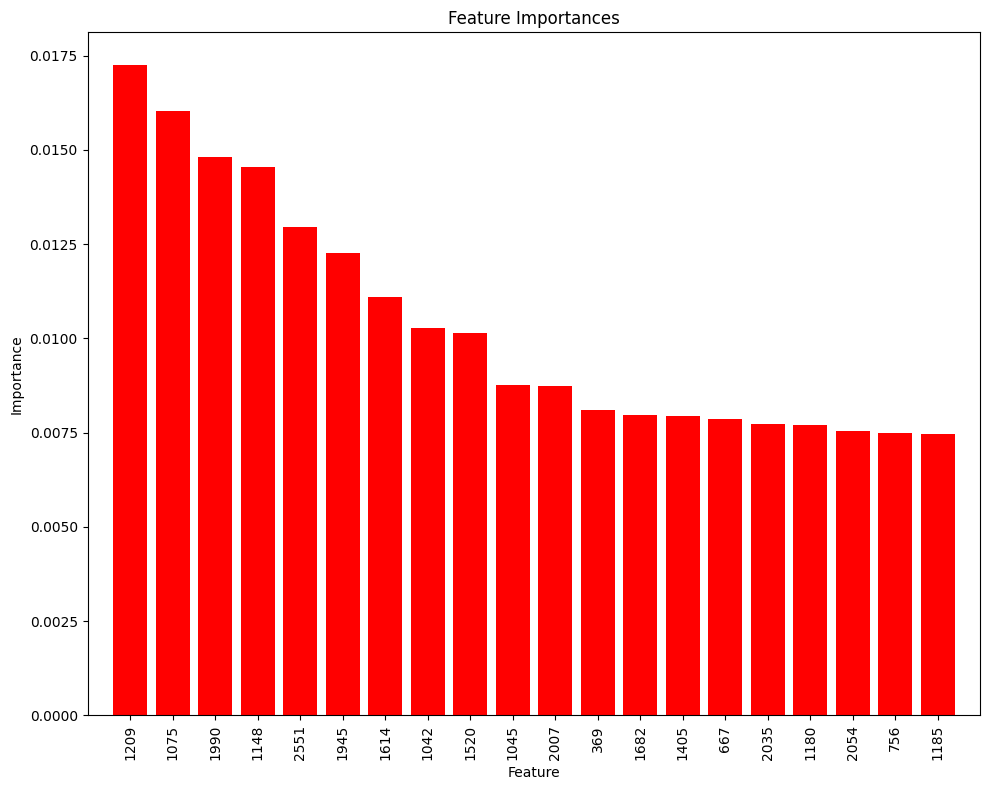

,Feature,Importance
0,1209,0.017253
1,1075,0.016042
2,1990,0.014805
3,1148,0.014537
4,2551,0.012954
5,1945,0.012255
6,1614,0.011090
7,1042,0.010280
8,1520,0.010150
9,1045,0.008764


In [15]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model
rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Calculate the cumulative sum of feature importances for explanation
cumulative_importances = np.cumsum(top_20_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(len(top_20_indices)), top_20_importances, color='r', align='center')
plt.xticks(range(len(top_20_indices)), top_20_features, rotation=90)
plt.xlim([-1, len(top_20_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features
top_20_features_importances = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importances})
top_20_features_importances


In [17]:
# Calculate the total variation explained by the top 20 features
total_variation_explained = cumulative_importances[-1]
total_variation_explained
print("Total Variation Explained (Top 20):", total_variation_explained)


Total Variation Explained (Top 20): 0.20661321211855632


This was just one method to find the top 20 important features and these 20 variables explain 16% of variations

### Top 20 using XGBoost

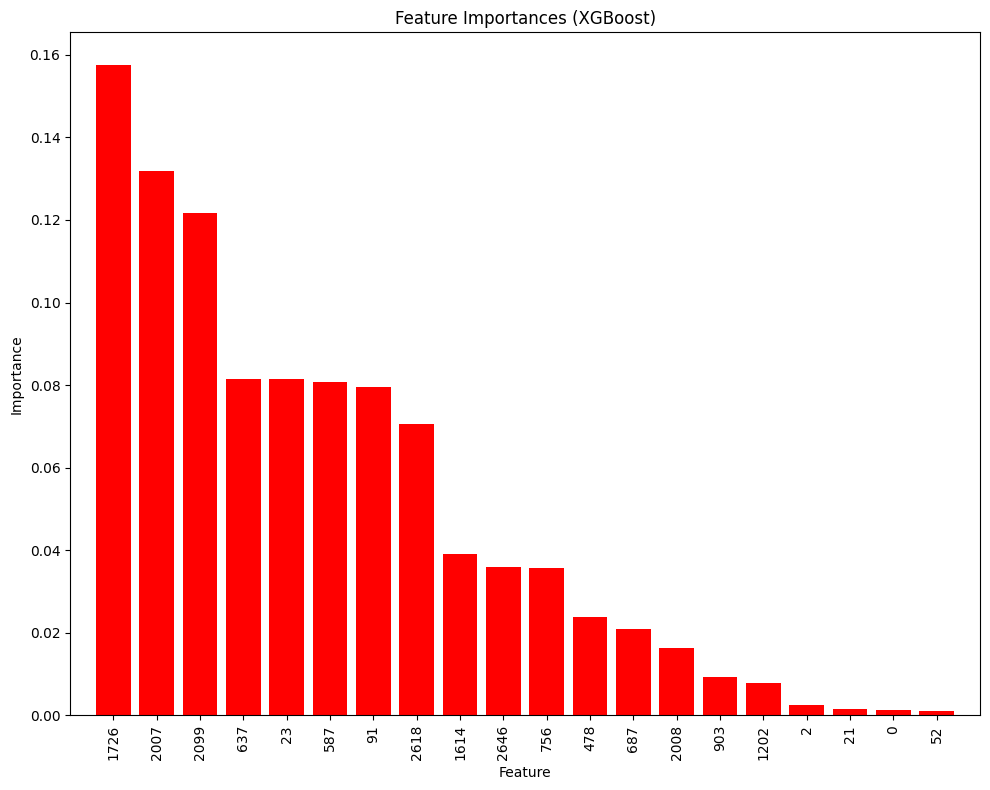

,Feature,Importance
0,1726,0.157567
1,2007,0.131929
2,2099,0.121576
3,637,0.081573
4,23,0.081520
5,587,0.080787
6,91,0.079547
7,2618,0.070465
8,1614,0.038972
9,2646,0.035952


In [22]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Fit the model
xgb.fit(X_scaled, y)

# Get feature importances
importances = xgb.feature_importances_

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Calculate the cumulative sum of feature importances for explanation
cumulative_importances = np.cumsum(top_20_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances (XGBoost)')
plt.bar(range(len(top_20_indices)), top_20_importances, color='r', align='center')
plt.xticks(range(len(top_20_indices)), top_20_features, rotation=90)
plt.xlim([-1, len(top_20_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features
top_20_features_importances = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importances})
top_20_features_importances




In [23]:
# Calculate the total variation explained by the top 20 features
total_variation_explained = cumulative_importances[-1]
print("Total Variation Explained (Top 20):", total_variation_explained)


Total Variation Explained (Top 20): 1.0


### Top 20 using LASSO 

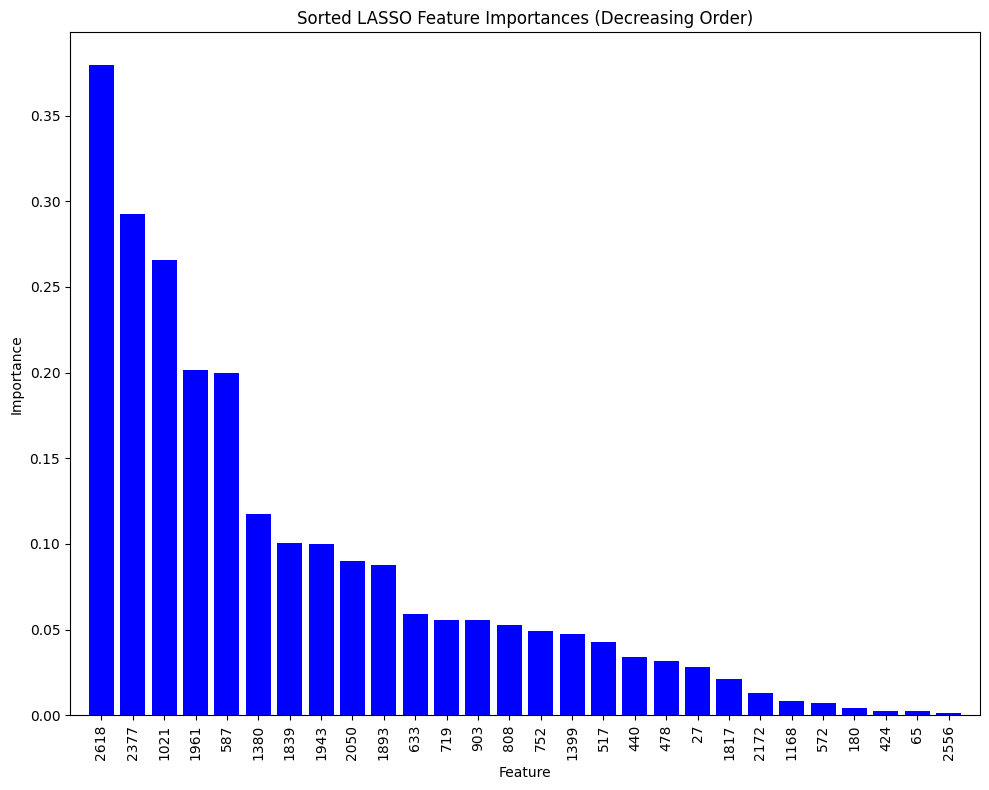

,Feature,Importance
0,2618,0.379691
1,2377,0.292771
2,1021,0.265475
3,1961,0.201706
4,587,0.199520
5,1380,0.117669
6,1839,0.100518
7,1943,0.100039
8,2050,0.090283
9,1893,0.087590


In [24]:
from sklearn.linear_model import Lasso

# Specify the number of features you want (e.g., top 20)
k_features = 20

# Train LASSO regression model
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get the indices of the selected features
top_k_indices = np.where(lasso.coef_ != 0)[0]

# Extract the top 20 features
top_20_features_lasso = X.columns[top_k_indices]
X_top_20_lasso = X[top_20_features_lasso]

# Assuming you have already obtained the top_20_features_lasso and lasso model
lasso_coefficients = lasso.coef_
top_20_importances_lasso = np.abs(lasso_coefficients[top_k_indices])

# Sort the LASSO features and importances in decreasing order
sorted_indices_lasso = np.argsort(top_20_importances_lasso)[::-1]
sorted_features_lasso = top_20_features_lasso[sorted_indices_lasso]
sorted_importances_lasso = top_20_importances_lasso[sorted_indices_lasso]

# Plot the sorted LASSO feature importances
plt.figure(figsize=(10, 8))
plt.title('Sorted LASSO Feature Importances (Decreasing Order)')
plt.bar(range(len(top_k_indices)), sorted_importances_lasso, color='b', align='center')
plt.xticks(range(len(top_k_indices)), sorted_features_lasso, rotation=90)
plt.xlim([-1, len(top_k_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features selected by LASSO in sorted order
sorted_features_importances_lasso = pd.DataFrame({'Feature': sorted_features_lasso, 'Importance': sorted_importances_lasso})
sorted_features_importances_lasso


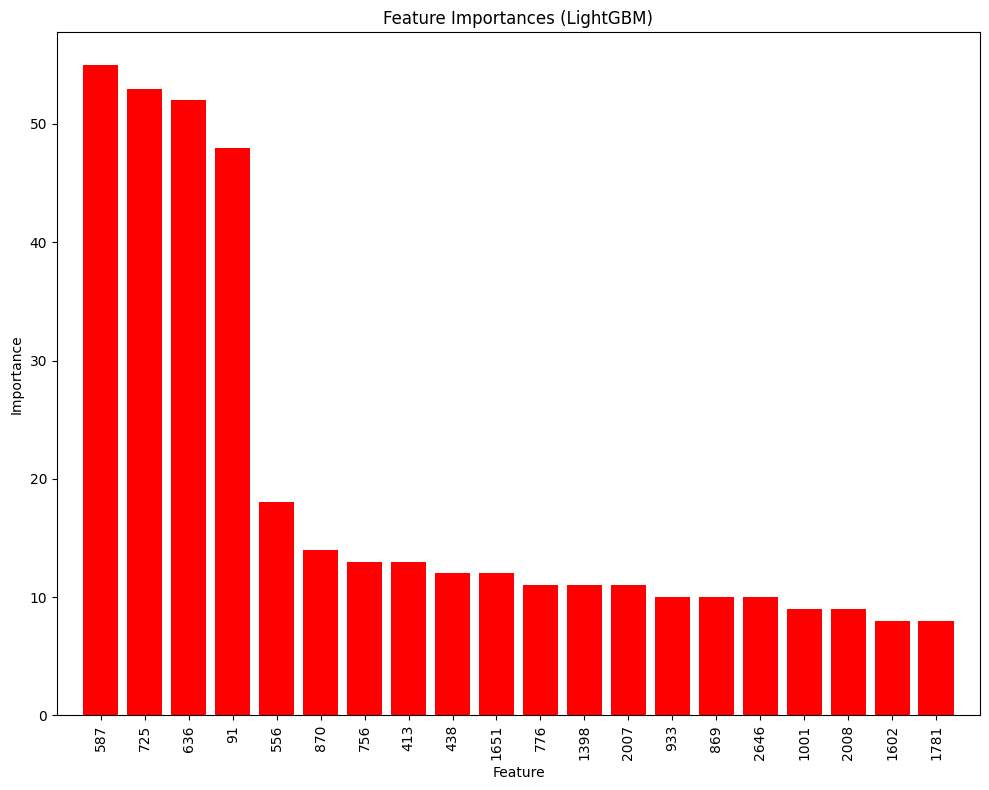

,Feature,Importance
0,587,55
1,725,53
2,636,52
3,91,48
4,556,18
5,870,14
6,756,13
7,413,13
8,438,12
9,1651,12


In [26]:
import lightgbm as lgb
# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Fit the model
lgb_classifier.fit(X_scaled, y)

# Get feature importances
importances = lgb_classifier.feature_importances_

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Calculate the cumulative sum of feature importances for explanation
cumulative_importances = np.cumsum(top_20_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances (LightGBM)')
plt.bar(range(len(top_20_indices)), top_20_importances, color='r', align='center')
plt.xticks(range(len(top_20_indices)), top_20_features, rotation=90)
plt.xlim([-1, len(top_20_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features
top_20_features_importances = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importances})
top_20_features_importances




In [30]:
# def preprocess_data(beer):
#     # Feature normalization
#     numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
#     X_features = beer[numeric_columns]
#     X_normalized = (X_features - X_features.mean()) / X_features.std()
#     beer[numeric_columns] = X_normalized
    
#     # Remove 'Sample' column
#     data_cleaned = beer.drop(['Sample'], axis=1)
    
#     # Exclude QC samples and classes 'All' and 'Water'
#     data_no_qc = data_cleaned[data_cleaned['QC'] == 0].drop('QC', axis=1)
#     data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]
    
#     # Encode 'Class' column using label encoding
#     le = LabelEncoder()
#     data_final['Class'] = le.fit_transform(data_final['Class'])
    
#     # Prepare features (X) and target (y) for model training
#     X = data_final.drop('Class', axis=1)
#     y = data_final['Class']
    
#     # Feature scaling using StandardScaler
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
#     return X_scaled, y

### Feature Importance

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

def display_top_features_table(model_name, top_features, top_importances):
    plt.figure(figsize=(10, 8))
    plt.title(f'Top 20 Features ({model_name})')
    plt.bar(range(len(top_features)), top_importances, color='r', align='center')
    plt.xticks(range(len(top_features)), top_features, rotation=90)
    plt.xlim([-1, len(top_features)])
    plt.ylabel('Importance')
    plt.xlabel('Feature')
    plt.tight_layout()
    plt.show()
    
    # Display the top features in a DataFrame
    top_features_importances = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})
    print(top_features_importances)

In [16]:
from sklearn.manifold import TSNE

def plot_pca_tsne(X_scaled, y, top_features_indices, model_name):
    # Selecting only the top 20 features for t-SNE visualization
    X_top_features = X_scaled[:, top_features_indices]
    
    # Initialize and fit the t-SNE model
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_top_features)
    
    # Initialize and fit the PCA model
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_top_features)
    
    # Plotting side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot t-SNE visualization
    axes[0].set_title(f't-SNE Visualization of Beer Classes ({model_name} - Top 20 Features)')
    for class_id in np.unique(y):
        axes[0].scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])
    axes[0].set_xlabel('t-SNE 1')
    axes[0].set_ylabel('t-SNE 2')
    axes[0].legend()
    
    # Plot PCA visualization
    axes[1].set_title(f'PCA Visualization of Beer Classes ({model_name} - Top 20 Features)')
    for class_id in np.unique(y):
        axes[1].scatter(X_pca[y == class_id, 0], X_pca[y == class_id, 1], label=le.inverse_transform([class_id])[0])
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

In [18]:
# Train Random Forest
rf_model = train_random_forest(X_scaled, y)
rf_top_indices = np.argsort(rf_model.feature_importances_)[::-1][:20]
rf_top_features = beer.columns[:-1][rf_top_indices]
rf_top_importances = rf_model.feature_importances_[rf_top_indices]
display_top_features_table('Random Forest', rf_top_features, rf_top_importances)
plot_pca_tsne(X_scaled, y, rf_top_indices, 'Random Forest')


NameError: name 'train_random_forest' is not defined

In [19]:
# Train XGBoost
xgb_model = train_xgboost(X_scaled, y)
xgb_top_indices = np.argsort(xgb_model.feature_importances_)[::-1][:20]
xgb_top_features = beer.columns[:-1][xgb_top_indices]
xgb_top_importances = xgb_model.feature_importances_[xgb_top_indices]
display_top_features_table('XGBoost', xgb_top_features, xgb_top_importances)
plot_pca_tsne(X_scaled, y, xgb_top_indices, 'XGBoost')

NameError: name 'train_xgboost' is not defined

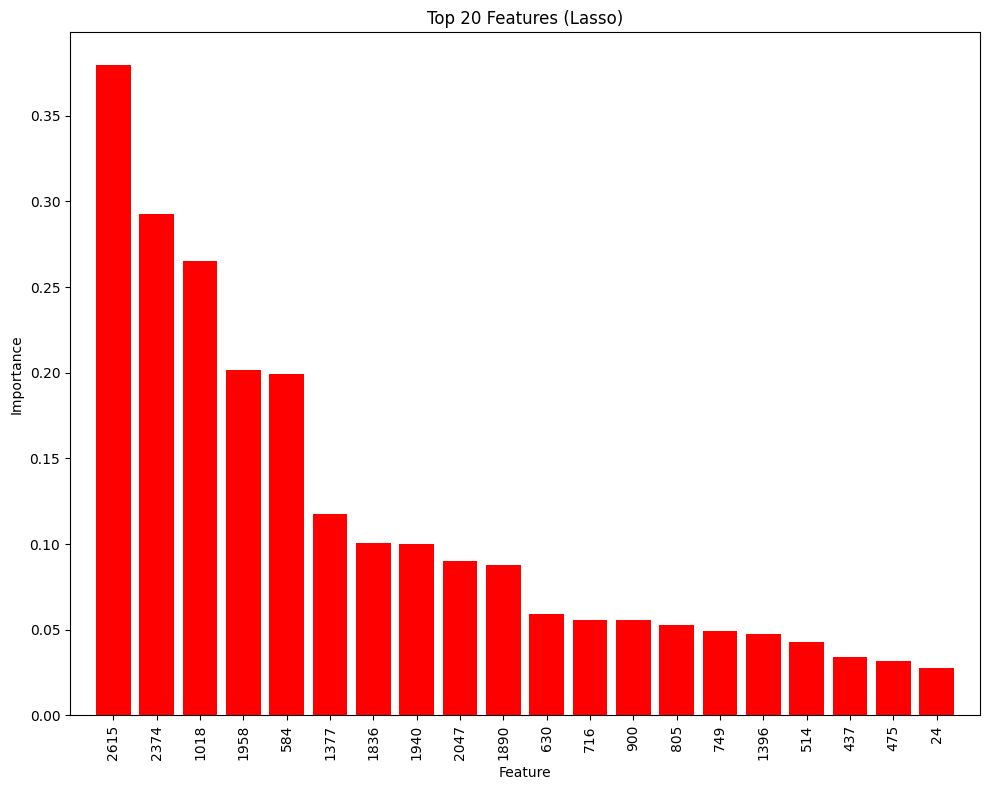

   Feature  Importance
0     2615    0.379691
1     2374    0.292771
2     1018    0.265475
3     1958    0.201706
4      584    0.199520
5     1377    0.117669
6     1836    0.100518
7     1940    0.100039
8     2047    0.090283
9     1890    0.087590
10     630    0.058936
11     716    0.055790
12     900    0.055610
13     805    0.052631
14     749    0.049063
15    1396    0.047699
16     514    0.042828
17     437    0.033886
18     475    0.031725
19      24    0.027904


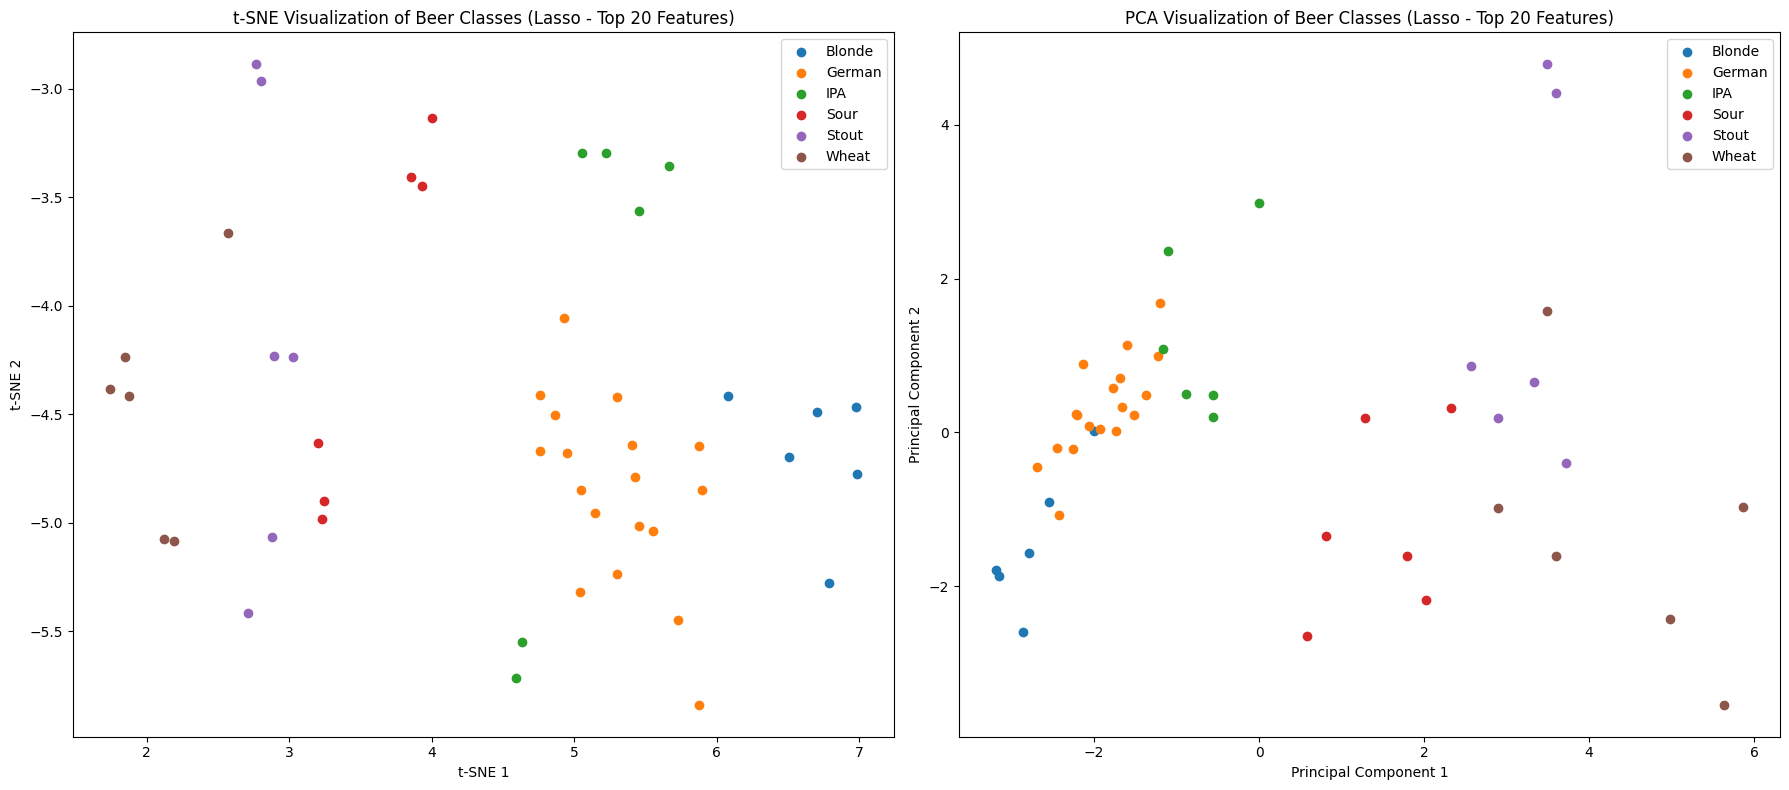

In [49]:
# Train Lasso
lasso_model = train_lasso(X_scaled, y)
lasso_top_indices = np.argsort(np.abs(lasso_model.coef_))[::-1][:20]
lasso_top_features = beer.columns[:-1][lasso_top_indices]
lasso_top_importances = np.abs(lasso_model.coef_)[lasso_top_indices]
display_top_features_table('Lasso', lasso_top_features, lasso_top_importances)
plot_pca_tsne(X_scaled, y, lasso_top_indices, 'Lasso')



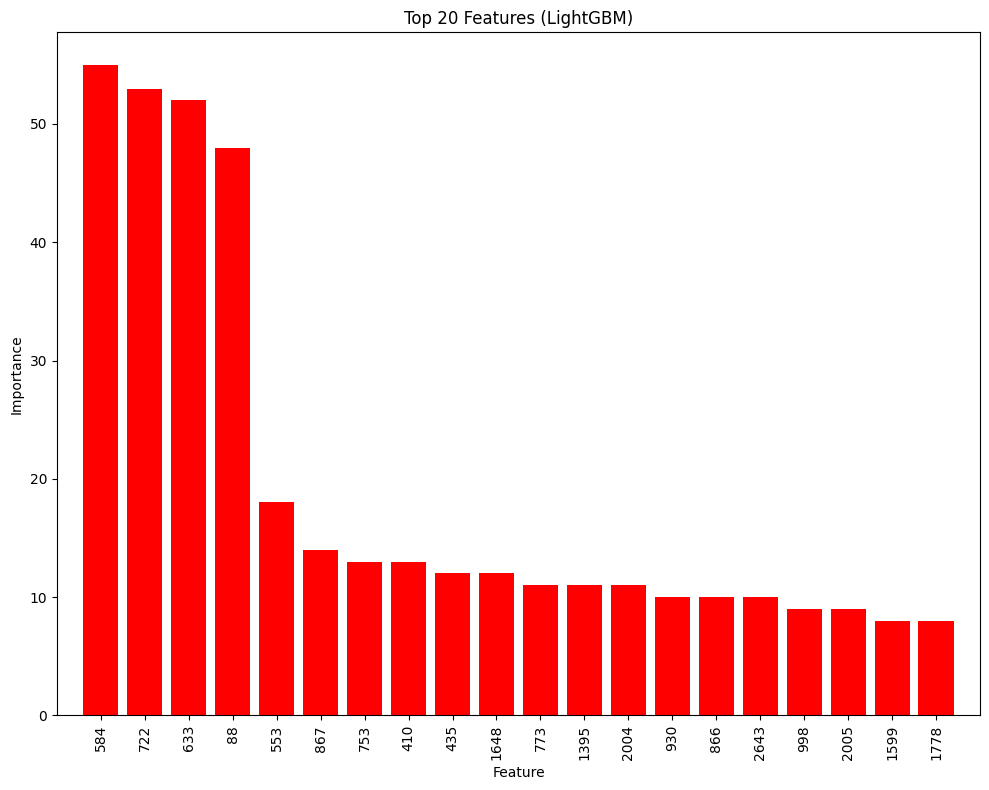

   Feature  Importance
0      584          55
1      722          53
2      633          52
3       88          48
4      553          18
5      867          14
6      753          13
7      410          13
8      435          12
9     1648          12
10     773          11
11    1395          11
12    2004          11
13     930          10
14     866          10
15    2643          10
16     998           9
17    2005           9
18    1599           8
19    1778           8


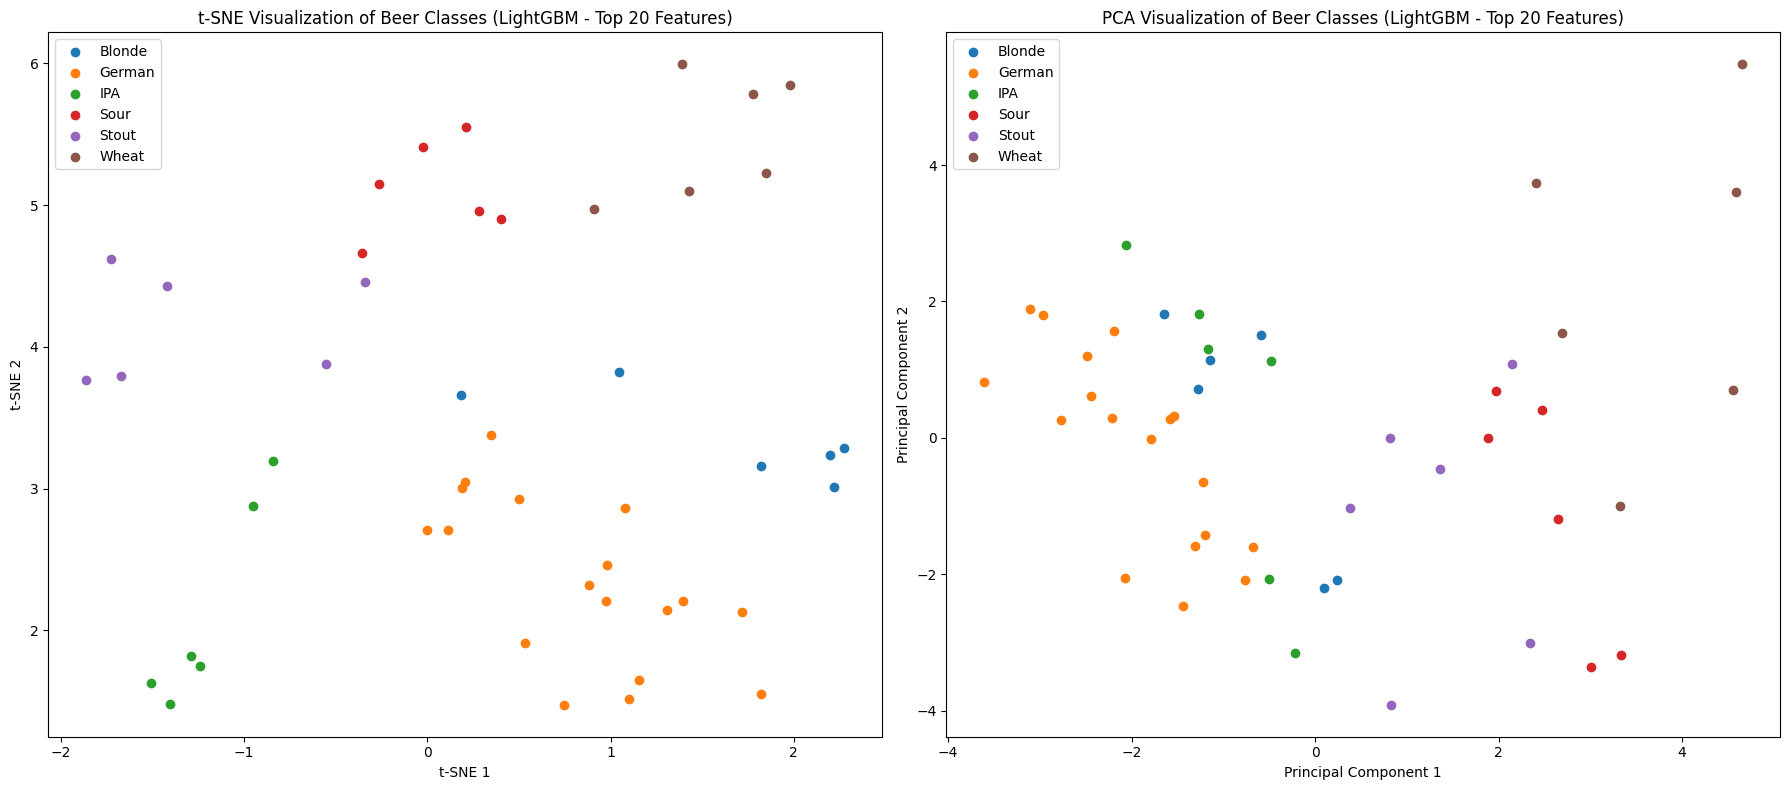

In [51]:
# Train LightGBM
lgb_model = train_lightgbm(X_scaled, y)
lgb_top_indices = np.argsort(lgb_model.feature_importances_)[::-1][:20]
lgb_top_features = beer.columns[:-1][lgb_top_indices]
lgb_top_importances = lgb_model.feature_importances_[lgb_top_indices]
display_top_features_table('LightGBM', lgb_top_features, lgb_top_importances)
plot_pca_tsne(X_scaled, y, lgb_top_indices, 'LightGBM')


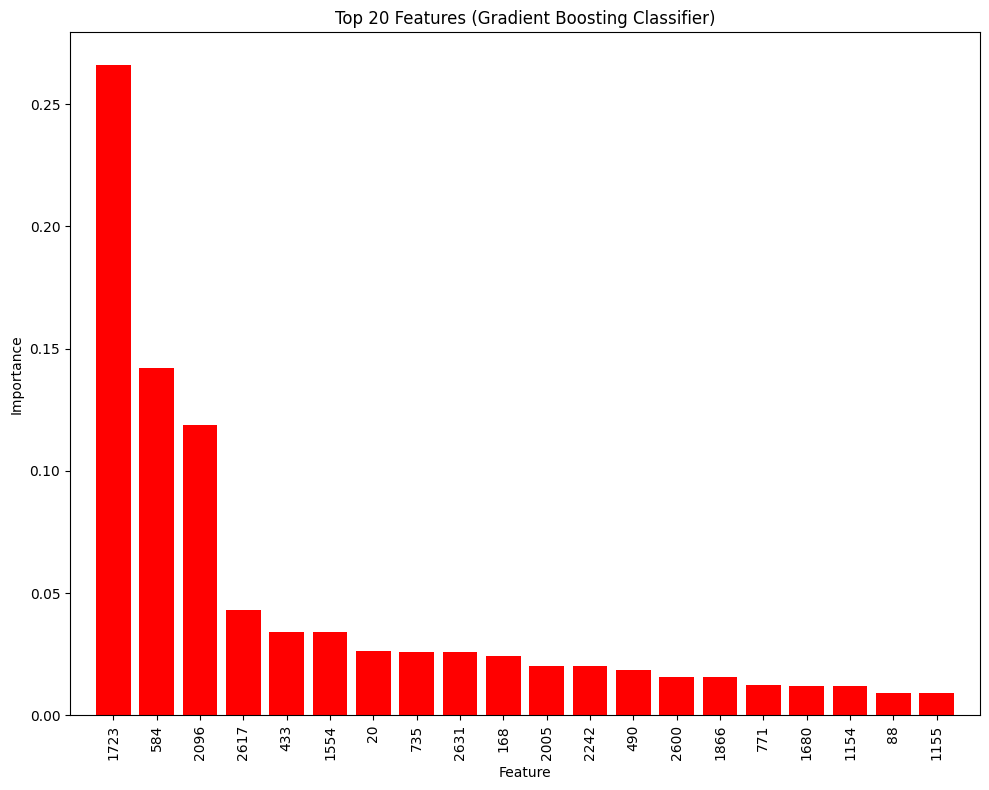

   Feature  Importance
0     1723    0.266096
1      584    0.141879
2     2096    0.118617
3     2617    0.043058
4      433    0.034044
5     1554    0.034044
6       20    0.026130
7      735    0.025947
8     2631    0.025947
9      168    0.024220
10    2005    0.020082
11    2242    0.020077
12     490    0.018372
13    2600    0.015450
14    1866    0.015450
15     771    0.012367
16    1680    0.011876
17    1154    0.011795
18      88    0.009045
19    1155    0.008933


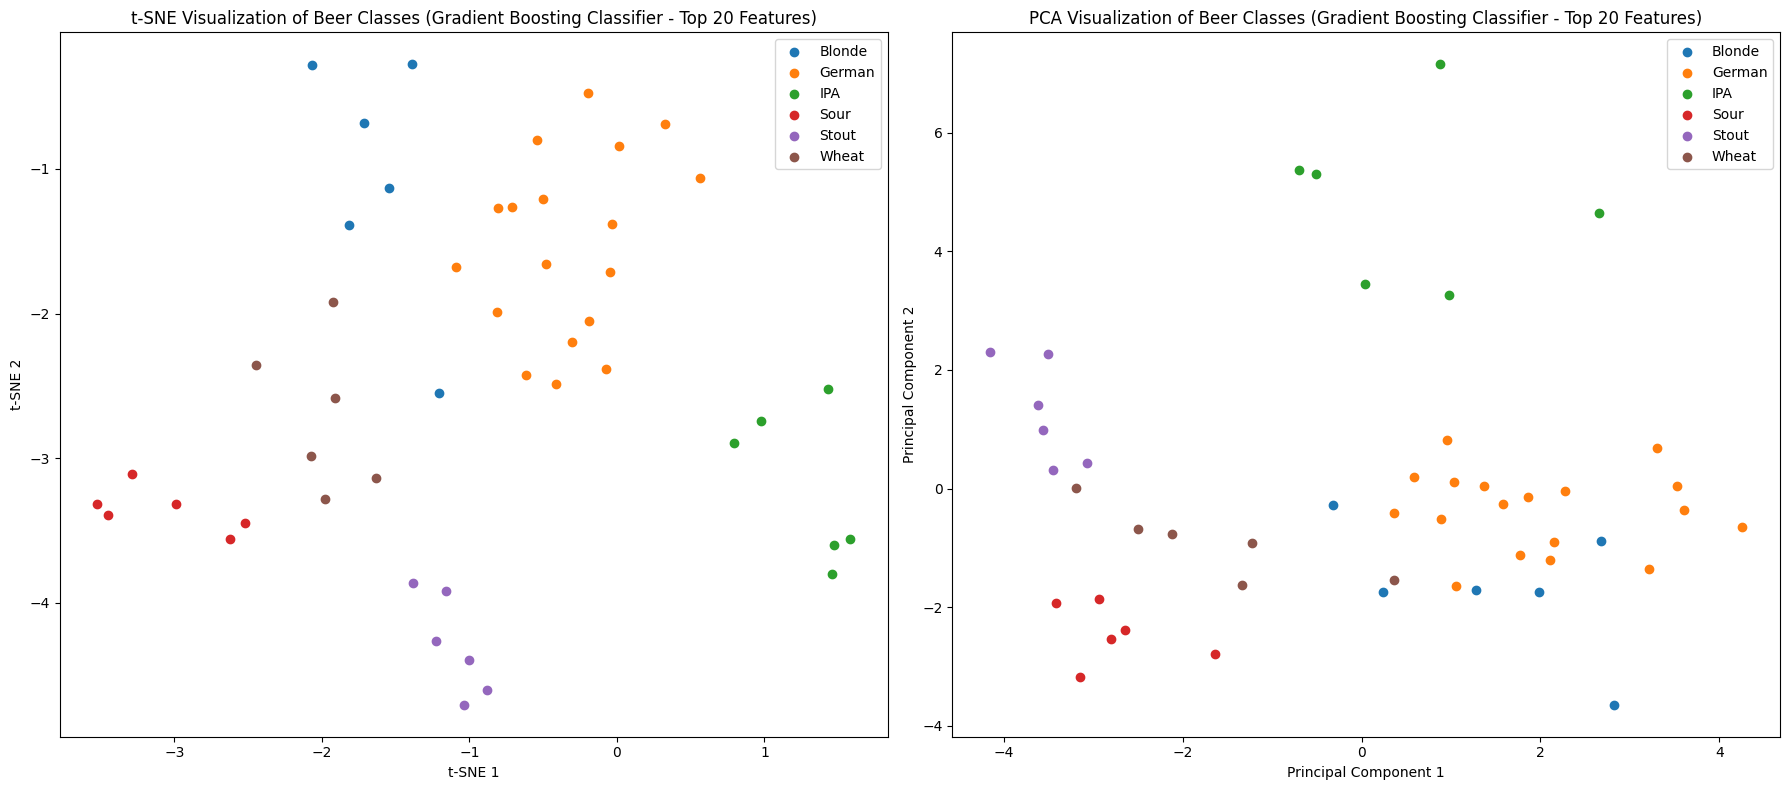

In [52]:
# Train Gradient Boosting Classifier
gb_model = train_gradient_boosting(X_scaled, y)
gb_top_indices = np.argsort(gb_model.feature_importances_)[::-1][:20]
gb_top_features = beer.columns[:-1][gb_top_indices]
gb_top_importances = gb_model.feature_importances_[gb_top_indices]
display_top_features_table('Gradient Boosting Classifier', gb_top_features, gb_top_importances)
plot_pca_tsne(X_scaled, y, gb_top_indices, 'Gradient Boosting Classifier')

### Total Variation Explained by the different Models

The total variation explained by the top 20 features represents the cumulative importance of these features in explaining the variability in the dataset. It's calculated based on the cumulative sum of the feature importances or coefficients of the top 20 features.

For models like Random Forest, XGBoost, LightGBM, and Gradient Boosting, which provide feature importances, the total variation explained is obtained by summing up the feature importances of the top 20 features. 

For models like Lasso, which provide coefficients for each feature, the total variation explained is calculated by summing up the absolute values of the coefficients of the top 20 features. 

In essence, the total variation explained quantifies how much of the variability in the data can be attributed to the selected features. It gives insight into the overall importance of these features in the context of the model and the dataset.

In [67]:
rf_cumulative_importances = np.cumsum(rf_top_importances)
rf_total_variation_explained = rf_cumulative_importances[-1]
xgb_cumulative_importances = np.cumsum(xgb_top_importances)
xgb_total_variation_explained = xgb_cumulative_importances[-1]
lasso_total_variation_explained = np.sum(np.abs(lasso_model.coef_))
lgb_cumulative_importances = np.cumsum(lgb_top_importances)
lgb_total_variation_explained = lgb_cumulative_importances[-1]
gb_cumulative_importances = np.cumsum(gb_top_importances)
gb_total_variation_explained = gb_cumulative_importances[-1]

In [68]:
import pandas as pd

# Create a dictionary to hold the total variation explained by each model
variation_data = {
    'Model': ['Random Forest', 'XGBoost', 'Lasso', 'LightGBM', 'Gradient Boosting Classifier'],
    'Total Variation Explained (Top 20)': [rf_total_variation_explained, 
                                            xgb_total_variation_explained, 
                                            lasso_total_variation_explained, 
                                            lgb_total_variation_explained, 
                                            gb_total_variation_explained]
}

# Create a DataFrame from the dictionary
variation_df = pd.DataFrame(variation_data)

# Display the DataFrame
print(variation_df)


                          Model  Total Variation Explained (Top 20)
0                 Random Forest                            0.206613
1                       XGBoost                            1.000000
2                         Lasso                            2.350940
3                      LightGBM                          387.000000
4  Gradient Boosting Classifier                            0.883430


### K fold cross validation

In [71]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Lasso': lasso_model,
    'LightGBM': lgb_model,
    'Gradient Boosting Classifier': gb_model
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf)
    print(f"Cross-Validation Scores ({model_name}):", cv_scores)    
    # Calculate and print the mean and standard deviation of the cross-validation scores
    print(f"Mean CV Score ({model_name}):", np.mean(cv_scores))
    print(f"Standard Deviation of CV Scores ({model_name}):", np.std(cv_scores))
    print()


Cross-Validation Scores (Random Forest): [0.8 0.8 0.6 1.  1. ]
Mean CV Score (Random Forest): 0.8400000000000001
Standard Deviation of CV Scores (Random Forest): 0.14966629547095767

Cross-Validation Scores (XGBoost): [0.6        0.8        0.5        1.         0.88888889]
Mean CV Score (XGBoost): 0.7577777777777778
Standard Deviation of CV Scores (XGBoost): 0.18384104782174607

Cross-Validation Scores (Lasso): [0.92763079 0.76519374 0.64409641 0.87738953 0.81157337]
Mean CV Score (Lasso): 0.8051767678581332
Standard Deviation of CV Scores (Lasso): 0.09777127797139028

Cross-Validation Scores (LightGBM): [0.3        0.3        0.2        0.55555556 0.55555556]
Mean CV Score (LightGBM): 0.38222222222222224
Standard Deviation of CV Scores (LightGBM): 0.14616074357693642

Cross-Validation Scores (Gradient Boosting Classifier): [0.8        0.9        0.4        1.         0.88888889]
Mean CV Score (Gradient Boosting Classifier): 0.7977777777777778
Standard Deviation of CV Scores (Gradient